<a href="https://colab.research.google.com/github/kuragaa/ML-HSE-24/blob/main/%D0%9B%D0%B0%D0%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving winemag-data_first150k.csv to winemag-data_first150k.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['winemag-data_first150k.csv']))

NameError: name 'pd' is not defined

# 0. Подготовка данных

In [ ]:
df.shape

(150930, 11)

In [ ]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
df.duplicated().sum()

53079

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(97851, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97851 entries, 0 to 149639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97848 non-null  object 
 1   description  97851 non-null  object 
 2   designation  67955 non-null  object 
 3   points       97851 non-null  int64  
 4   price        89131 non-null  float64
 5   province     97848 non-null  object 
 6   region_1     81919 non-null  object 
 7   region_2     39491 non-null  object 
 8   variety      97851 non-null  object 
 9   winery       97851 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.isnull().mean() * 100

country         0.003066
description     0.000000
designation    30.552575
points          0.000000
price           8.911508
province        0.003066
region_1       16.281898
region_2       59.641700
variety         0.000000
winery          0.000000
dtype: float64

In [ ]:
df = df.drop(columns=['region_2'])

In [ ]:
df = df.drop(columns=['designation'])

In [ ]:
df = df.drop(columns=['region_1'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97851 entries, 0 to 97850
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97848 non-null  object 
 1   description  97851 non-null  object 
 2   points       97851 non-null  int64  
 3   price        89131 non-null  float64
 4   province     97848 non-null  object 
 5   variety      97851 non-null  object 
 6   winery       97851 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.2+ MB


In [ ]:
df = df.dropna(subset=['country', 'province'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97848 entries, 0 to 97850
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97848 non-null  object 
 1   description  97848 non-null  object 
 2   points       97848 non-null  int64  
 3   price        89128 non-null  float64
 4   province     97848 non-null  object 
 5   variety      97848 non-null  object 
 6   winery       97848 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.0+ MB


In [ ]:
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97848 entries, 0 to 97850
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97848 non-null  object 
 1   description  97848 non-null  object 
 2   points       97848 non-null  int64  
 3   price        97848 non-null  float64
 4   province     97848 non-null  object 
 5   variety      97848 non-null  object 
 6   winery       97848 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.0+ MB


# 1. Типы данных и создание новых переменных

In [ ]:
df.describe()

,points,price
count,97848.000000,97848.000000
mean,87.956759,32.887530
std,3.218097,36.037522
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,90.000000,38.000000
max,100.000000,2300.000000


In [ ]:
df.describe(include='object')

,country,description,province,variety,winery
count,97848,97848,97848,97848,97848
unique,48,97818,455,632,14809
top,US,"Dark, earthy and rubbery aromas go along with ...",California,Pinot Noir,Williams Selyem
freq,40544,2,28800,9282,235


In [ ]:
df['price_for_points'] = df['price'] / df['points']

In [ ]:
print(df[['price', 'points', 'price_for_points']].head())

   price  points  price_for_points
0  235.0      96          2.447917
1  110.0      96          1.145833
2   90.0      96          0.937500
3   65.0      96          0.677083
4   66.0      95          0.694737


# 2. Генеральная совокупность и выборка, частотные таблицы и распределения

In [ ]:
country_freq = df['country'].value_counts()
print(country_freq)

country
US                        40544
Italy                     14850
France                    14459
Spain                      5443
Chile                      3735
Portugal                   3508
Argentina                  3447
Australia                  3152
Austria                    1959
New Zealand                1865
Germany                    1529
South Africa               1481
Greece                      541
Israel                      370
Canada                      149
Hungary                     139
Romania                     106
Slovenia                     72
Croatia                      70
Bulgaria                     56
Mexico                       54
Uruguay                      52
Moldova                      46
Turkey                       46
Georgia                      30
Lebanon                      27
Cyprus                       15
Brazil                       14
Macedonia                    12
Morocco                      11
Serbia                       10


In [ ]:
sample_df = df.sample(n=100, random_state=1)

mean_price_sample = sample_df['price'].mean()
mean_price_total = df['price'].mean()

print("Средняя цена в выборке:", mean_price_sample)
print("Средняя цена во всем наборе данных:", mean_price_total)

Средняя цена в выборке: 31.96
Средняя цена во всем наборе данных: 32.88752963780558


# 3. Описательные статистики


In [ ]:
df.describe()

,points,price,price_for_points
count,97848.000000,97848.000000,97848.000000
mean,87.956759,32.887530,0.368276
std,3.218097,36.037522,0.382496
min,80.000000,4.000000,0.046512
25%,86.000000,17.000000,0.191011
50%,88.000000,25.000000,0.280899
75%,90.000000,38.000000,0.430108
max,100.000000,2300.000000,23.232323


In [ ]:
mode_price = df['price'].mode()[0]
mode_points = df['points'].mode()[0]

range_price = df['price'].max() - df['price'].min()
range_points = df['points'].max() - df['points'].min()

variance_price = df['price'].var()
variance_points = df['points'].var()

std_dev_price = df['price'].std()
std_dev_points = df['points'].std()

print(f"Мода (цена): {mode_price}")
print(f"Мода (оценка): {mode_points}")
print(f"Размах (цена): {range_price}")
print(f"Размах (оценка): {range_points}")
print(f"Дисперсия (цена): {variance_price}")
print(f"Дисперсия (оценка): {variance_points}")
print(f"Стандартное отклонение (цена): {std_dev_price}")
print(f"Стандартное отклонение (оценка): {std_dev_points}")

Мода (цена): 25.0
Мода (оценка): 87
Размах (цена): 2296.0
Размах (оценка): 20
Дисперсия (цена): 1298.7029879675824
Дисперсия (оценка): 10.35614836725435
Стандартное отклонение (цена): 36.03752194543324
Стандартное отклонение (оценка): 3.2180970102304793


# 4. Z-оценка и выбросы

In [ ]:
from scipy import stats

df['z_score_price'] = stats.zscore(df['price']) # Рассчет Z-баллов

outliers = df[abs(df['z_score_price']) > 3] # Определение порога для выбросо

print("Количество выбросов:", len(outliers))

Количество выбросов: 1128


In [ ]:
df_new = df[(abs(df['z_score_price']) <= 3)]

# 5. Корреляция

Корреляционная матрица:
                     points     price  price_for_points  z_score_price
points            1.000000  0.420486          0.402267       0.420486
price             0.420486  1.000000          0.998993       1.000000
price_for_points  0.402267  0.998993          1.000000       0.998993
z_score_price     0.420486  1.000000          0.998993       1.000000



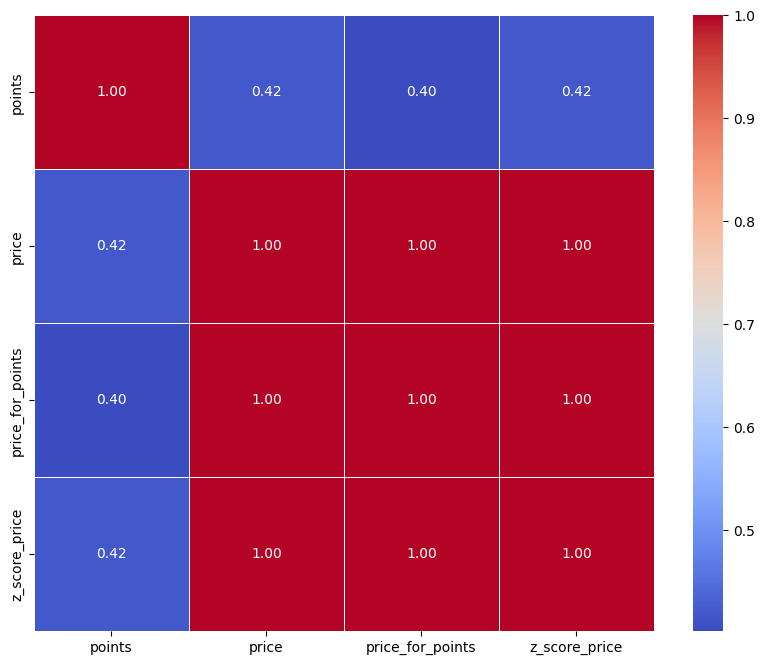

In [ ]:
numeric_df = df.select_dtypes(include='number')
matrix = numeric_df.corr()
print('Корреляционная матрица:\n', matrix)
print()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# 6. Гистограмма для переменной оценки и диаграмма размаха для переменной цена

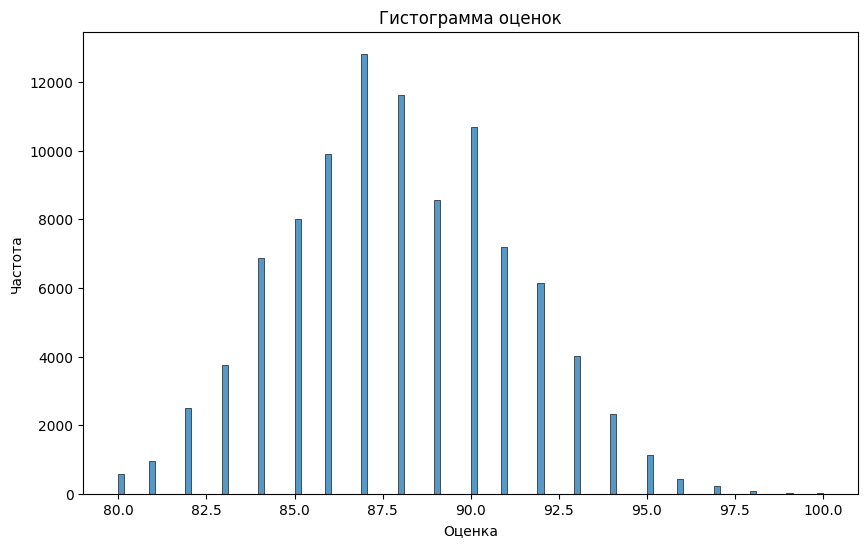

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['points'])
plt.title('Гистограмма оценок')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.show()

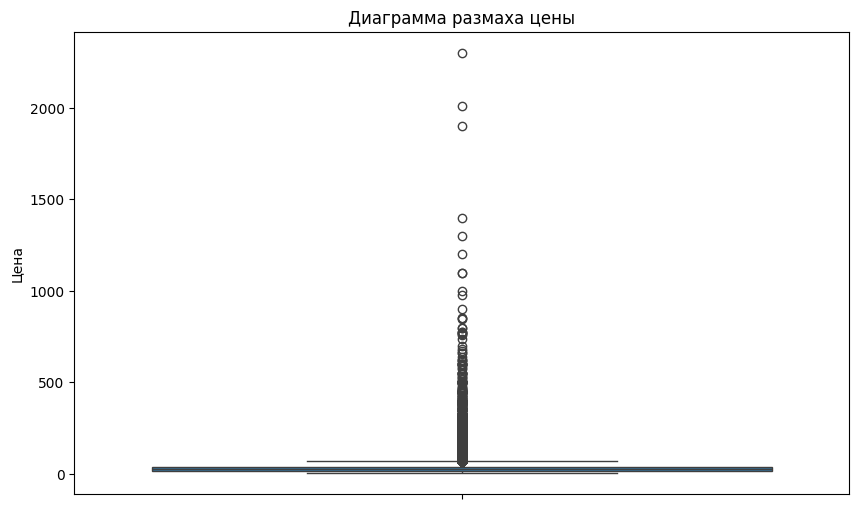

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df)
plt.title('Диаграмма размаха цены')
plt.ylabel('Цена')
plt.show()

# 7. Диаграмма рассеяния

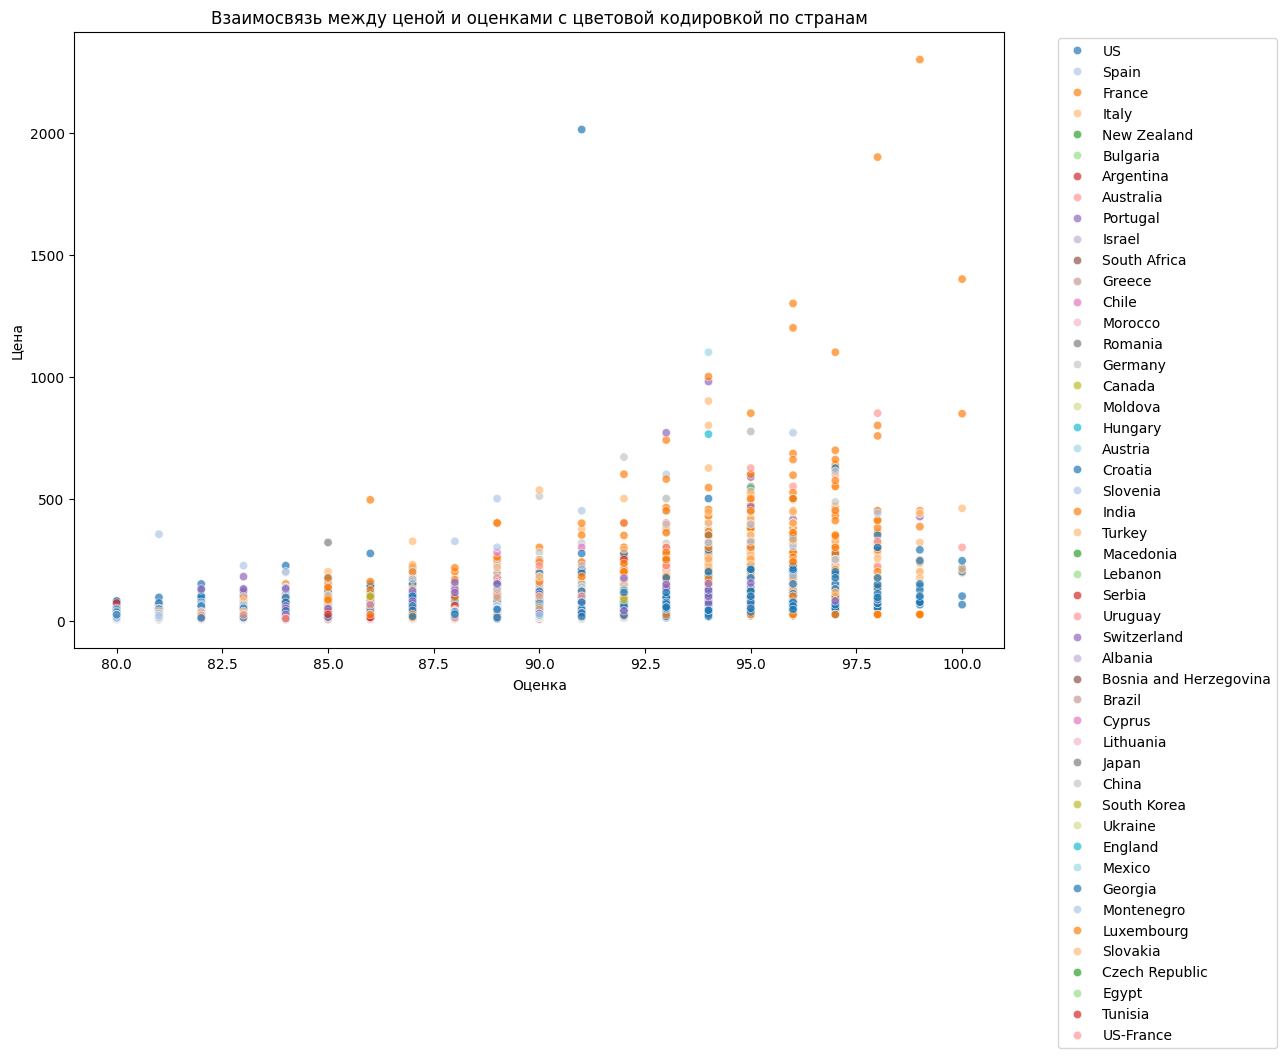

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='points', y='price', hue='country', data=df, palette='tab20', alpha=0.7)
plt.title('Взаимосвязь между ценой и оценками с цветовой кодировкой по странам')
plt.xlabel('Оценка')
plt.ylabel('Цена')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 8. Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_new[['points']]
y = df_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Значение R²: {r2}")

Значение R²: 0.26532752497402545


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# One-hot encoding для категориальных переменных
categorical_features = ['country', 'province', 'variety']
numerical_features = ['points']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Создание модели линейной регрессии
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Разделение данных на обучающую и тестовую выборки
X = df_new[['points', 'country', 'province', 'variety']]
y = df_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование и пересчет R²
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Значение R² после улучшения: {r2}")


Значение R² после улучшения: 0.3994454295988974


# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

# Создание бинарного признака - вино из США
df_new['is_usa'] = (df_new['country'] == 'US').astype(int)


X = df_new[['points', 'price']]
y = df_new['is_usa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = log_reg.score(X_test, y_test)
print(f"Точность модели: {accuracy}")


<ipython-input-66-b019c8da9a9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['is_usa'] = (df_new['country'] == 'US').astype(int)


Точность модели: 0.5824545078577337
